In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [35]:
df = pd.read_csv('loan_data.csv')

In [36]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [38]:
X = df.drop('loan_status',axis=1)
y = df.loan_status

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [40]:
num_col = xtrain.select_dtypes(include='number').columns
obj_col = xtrain.select_dtypes(include='object').columns

Checking outliers in `numerical columns`

<Axes: >

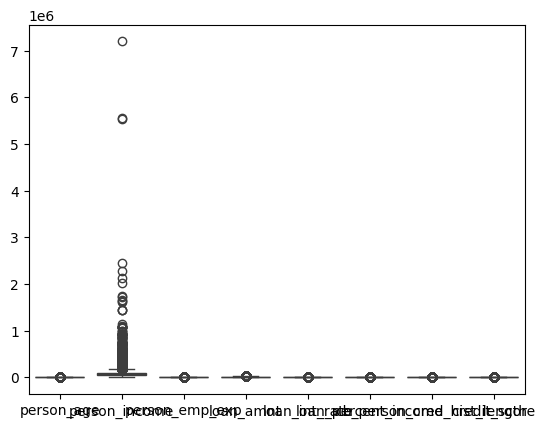

In [41]:
sns.boxplot(df[num_col])

In [42]:
def cat_cols_nunique(cols):
    for col in cols:
        print(f'{col} - {df[col].nunique()}')

In [43]:
cat_cols_nunique(obj_col)

person_gender - 2
person_education - 5
person_home_ownership - 4
loan_intent - 6
previous_loan_defaults_on_file - 2


In [44]:
preprocessing  = ColumnTransformer(
    transformers=[
        ('scaler',RobustScaler(),num_col),
        ('onehotencoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),obj_col.drop('person_education')),
        ('ordinal_encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['person_education']),        
    ]
)

In [48]:
decisiontree_pipeline = Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',DecisionTreeClassifier())
    ]
)
decisiontree_pipeline.fit(xtrain,ytrain)
print(f"Train score : {decisiontree_pipeline.score(xtrain,ytrain)}")
print(f"Test score : {decisiontree_pipeline.score(xtest,ytest)}")

Train score : 1.0
Test score : 0.9026666666666666


In [49]:
logistic_pipeline = Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',LogisticRegression())
    ]
)
logistic_pipeline.fit(xtrain,ytrain)
print(f"Train score : {logistic_pipeline.score(xtrain,ytrain)}")
print(f"Test score : {logistic_pipeline.score(xtest,ytest)}")

Train score : 0.8973333333333333
Test score : 0.8937777777777778
